# To predict fraudulent credit card transactions with the help of machine learning models

### Problem statement-

The aim of the project is to predict fraudulent credit card transactions using machine learning models. This is crucial from the bank’s as well as customer’s perspective. The banks cannot afford to lose their customers’ money to fraudsters. Every fraud is a loss to the bank as the bank is responsible for the fraud transactions.

The dataset contains transactions made over a period of two days in September 2013 by European credit cardholders. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions. We need to take care of the data imbalance while building the model and come up with the best model by trying various algorithms.

The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. The data set has also been modified with principal component analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value of 1 in cases of fraud and 0 in others.



## Project pipeline-
The project pipeline can be briefly summarised in the following four steps:

1. Data Understanding
2. Exploratory data analytics (EDA)
3. Train/Test split
4. Model building / hyperparameter tuning
5. Model evaluation

#### Importing important libraries

In [1]:
# Importing the libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 500)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
df = pd.read_csv("/content/drive/MyDrive/chrisanne/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory data analysis

### Reading and understanding the data

In [7]:
df.shape

(284807, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,2.239053e-15,1.673327e-15,-1.247012e-15,8.190001e-16,1.207294e-15,4.887456e-15,1.437716e-15,-3.772171e-16,9.564149e-16,1.039917e-15,6.406204e-16,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


## Handling missing values

#### Handling missing values in columns

In [10]:
# Cheking percent of missing values in columns
df_missing_columns = (round(((df.isnull().sum()/len(df.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
Time,0.0
V16,0.0
Amount,0.0
V28,0.0
V27,0.0
V26,0.0
V25,0.0
V24,0.0
V23,0.0
V22,0.0


It is evident that every column has all of its values complete. Therefore, null values are not an issue for the full dataset.





### Checking the distribution of the classes

In [11]:
classes = df['Class'].value_counts()
classes

0    284315
1       492
Name: Class, dtype: int64

In [12]:
normal_share = round((classes[0]/df['Class'].count()*100),2)
normal_share

99.83

In [13]:
fraud_share = round((classes[1]/df['Class'].count()*100),2)
fraud_share

0.17





It is evident that the percentage of frauds is 0.17%. The imbalance of classes will be addressed later.

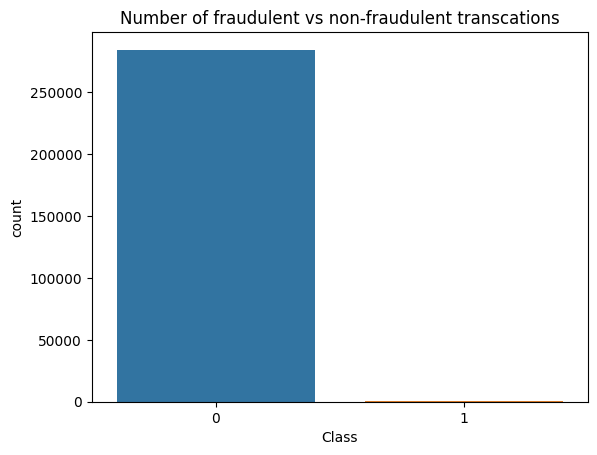

In [14]:
# Bar plot for the number of fraudulent vs non-fraudulent transcations
sns.countplot(x='Class', data=df)
plt.title('Number of fraudulent vs non-fraudulent transcations')
plt.show()

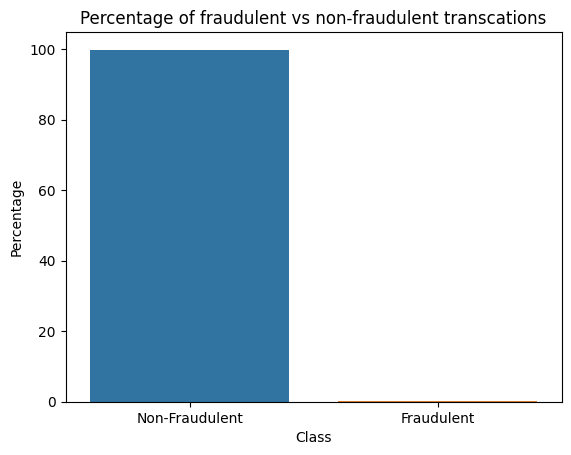

In [15]:
# Bar plot for the percentage of fraudulent vs non-fraudulent transcations
fraud_percentage = {'Class':['Non-Fraudulent', 'Fraudulent'], 'Percentage':[normal_share, fraud_share]}
df_fraud_percentage = pd.DataFrame(fraud_percentage)
sns.barplot(x='Class',y='Percentage', data=df_fraud_percentage)
plt.title('Percentage of fraudulent vs non-fraudulent transcations')
plt.show()

## Outliers treatment

For this specific dataset, we are not treating any outliers.
Since every column has already undergone PCA transformation, it is believed that the outlier values will be taken into account during the data transformation process.

### Observe the distribution of classes with time

In [ ]:
# Creating fraudulent dataframe
data_fraud = df[df['Class'] == 1]
# Creating non fraudulent dataframe
data_non_fraud = df[df['Class'] == 0]

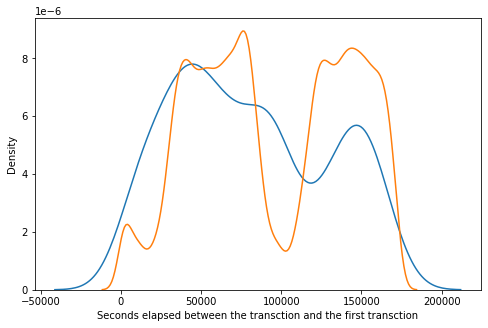

In [ ]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Time'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

##### Analysis
Regarding Time, we observe no discernible pattern in either the fraudulent or non-fraudulent transactions.
As a result, the Time column can be removed.

In [ ]:
# Dropping the Time column
df.drop('Time', axis=1, inplace=True)

### Observe the distribution of classes with amount

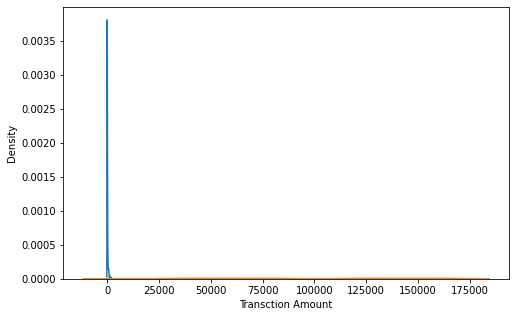

In [ ]:
# Distribution plot
plt.figure(figsize=(8,5))
ax = sns.distplot(data_fraud['Amount'],label='fraudulent',hist=False)
ax = sns.distplot(data_non_fraud['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Transction Amount')
plt.show()

##### Analysis
It is evident that the majority of fraudulent transactions occur in the lower range of amounts, while the non-fraudulent transactions are dispersed over the low to high range.

## Train-Test Split

In [ ]:
# Import library
from sklearn.model_selection import train_test_split

In [ ]:
# Putting feature variables into X
X = df.drop(['Class'], axis=1)

In [ ]:
# Putting target variable to y
y = df['Class']

In [ ]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

## Feature Scaling
Only the Amount column needs to be scaled; the PCA transformation has already scaled the other columns.

In [ ]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [ ]:
# Instantiate the Scaler
scaler = StandardScaler()

In [ ]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [ ]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
201788,2.023734,-0.429219,-0.691061,-0.201461,-0.162486,0.283718,-0.674694,0.192230,1.124319,-0.037763,0.308648,0.875063,-0.009562,0.116038,0.086537,0.628337,-0.997868,0.482547,0.576077,-0.171390,-0.195207,-0.477813,0.340513,0.059174,-0.431015,-0.297028,-0.000063,-0.046947,-0.345273
179369,-0.145286,0.736735,0.543226,0.892662,0.350846,0.089253,0.626708,-0.049137,-0.732566,0.297692,0.519027,0.041275,-0.690783,0.647121,0.526333,-1.098558,0.511739,0.243984,3.349611,0.206709,-0.124288,-0.263560,-0.110568,-0.434224,-0.509076,0.719784,-0.006357,0.146053,-0.206439
73138,-3.015846,-1.920606,1.229574,0.721577,1.089918,-0.195727,-0.462586,0.919341,-0.612193,-0.966197,1.106534,1.026421,-0.474229,0.641488,-0.430684,-0.631257,0.634633,-0.718062,-0.039929,0.842838,0.274911,-0.319550,0.212891,-0.268792,0.241190,0.318445,-0.100726,-0.365257,0.358043
208679,1.851980,-1.007445,-1.499762,-0.220770,-0.568376,-1.232633,0.248573,-0.539483,-0.813368,0.785431,-0.784316,0.673626,1.428269,0.043937,-0.309507,-1.805728,-0.012118,0.377096,-0.658353,-0.196551,-0.406722,-0.899081,0.137370,0.075894,-0.244027,0.455618,-0.094066,-0.031488,0.362400
206534,2.237844,-0.551513,-1.426515,-0.924369,-0.401734,-1.438232,-0.119942,-0.449263,-0.717258,0.851668,-0.497634,-0.445482,0.324575,0.125543,0.266588,0.802640,0.225312,-1.865494,0.621879,-0.045417,0.050447,0.125601,0.215531,-0.080485,-0.063975,-0.307176,-0.042838,-0.063872,-0.316109


##### Scaling the test set
We don't fit scaler on the test set. We only transform the test set.

In [ ]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
49089,1.229452,-0.235478,-0.627166,0.419877,1.797014,4.069574,-0.896223,1.036103,0.745991,-0.147304,-0.850459,0.397845,-0.259849,-0.277065,-0.766810,-0.200946,-0.338122,0.006032,0.477431,-0.057922,-0.170060,-0.288750,-0.130270,1.025935,0.847990,-0.271476,0.060052,0.018104,-0.340485
154704,2.016893,-0.088751,-2.989257,-0.142575,2.675427,3.332289,-0.652336,0.752811,1.962566,-1.025024,1.126976,-2.418093,1.250341,-0.056209,-0.736695,0.014783,1.890249,0.333755,-0.450398,-0.147619,-0.184153,-0.089661,0.087188,0.570679,0.101899,0.620842,-0.048958,-0.042831,-0.320859
67247,0.535093,-1.469185,0.868279,0.385462,-1.439135,0.368118,-0.499370,0.303698,1.042073,-0.437209,1.145725,0.907573,-1.095634,-0.055080,-0.621880,-0.191066,0.311988,-0.478635,0.231159,0.437685,0.028010,-0.384708,-0.128376,0.286638,-0.136700,0.913904,-0.083364,0.052485,0.853442
251657,2.128486,-0.117215,-1.513910,0.166456,0.359070,-0.540072,0.116023,-0.216140,0.680314,0.079977,-1.705327,-0.127579,-0.207945,0.307878,0.213491,0.163032,-0.587029,-0.561292,0.472667,-0.227278,-0.357993,-0.905085,0.223474,-1.075605,-0.188519,0.267672,-0.071733,-0.072238,-0.344410
201903,0.558593,1.587908,-2.368767,5.124413,2.171788,-0.500419,1.059829,-0.254233,-1.959060,0.948915,-0.288169,-1.007647,0.470316,-2.771902,0.221958,0.354333,2.603189,1.092576,0.668084,0.249457,-0.035049,0.271455,0.381606,0.332001,-0.334757,0.448890,0.168585,0.004955,-0.229480


## Checking the Skewness

In [ ]:
# Listing the columns
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

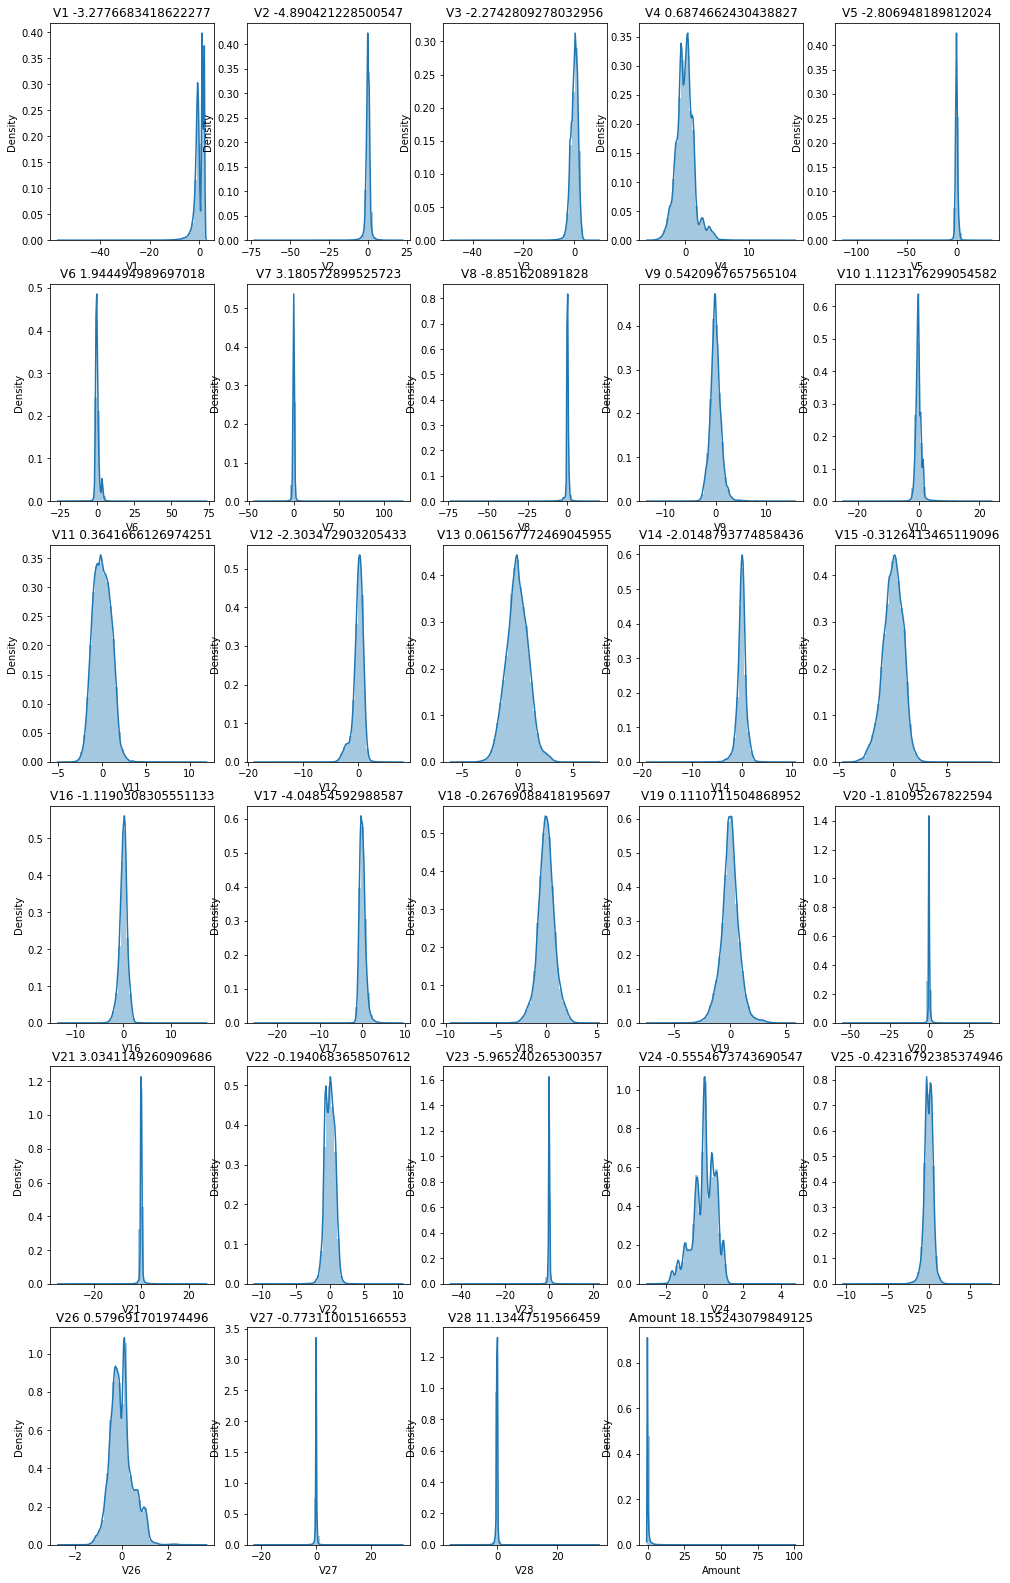

In [ ]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

We see that there are many variables, which are heavily skewed. We will mitigate the skewness only for those variables for bringing them into normal distribution.

### Mitigate skweness with PowerTransformer

In [ ]:
# Importing PowerTransformer
from sklearn.preprocessing import PowerTransformer
# Instantiate the powertransformer
pt = PowerTransformer(method='yeo-johnson', standardize=True, copy=False)
# Fit and transform the PT on training data
X_train[cols] = pt.fit_transform(X_train)

In [ ]:
# Transform the test set
X_test[cols] = pt.transform(X_test)

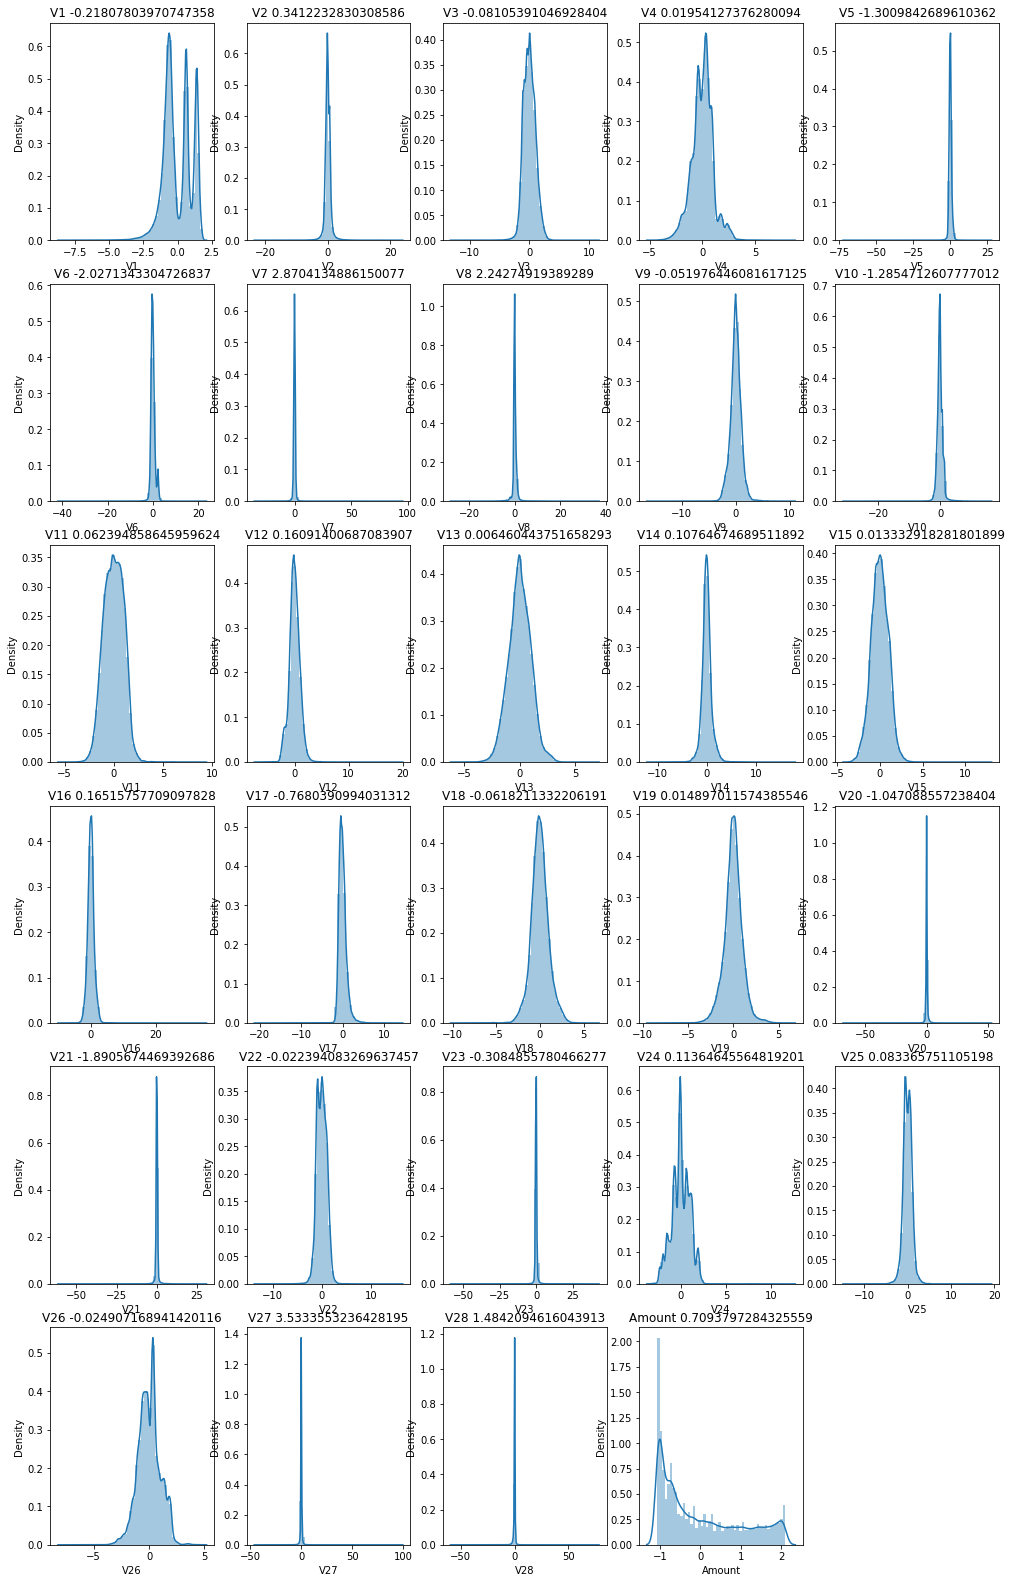

In [ ]:
# Plotting the distribution of the variables (skewness) of all the columns
k=0
plt.figure(figsize=(17,28))
for col in cols :
    k=k+1
    plt.subplot(6, 5,k)
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

Now we can see that all the variables are normally distributed after the transformation.

# Model building on imbalanced data

### Metric selection for heavily imbalanced data
Since only 0.17% of the transactions are fraudulent, we can't consider accuracy to be a good metric for assessing the model given the extreme imbalance of the data. This is because, even if every datapoint returns a specific class (1/0), regardless of prediction, the model will still yield an accuracy of more than 99%. Therefore, in order to fairly assess the model, we must measure the ROC-AUC score. The ROC curve is a useful tool for assessing the model's performance at all classification thresholds; the default threshold of 0.5 isn't always the best threshold to determine the best classification label for the test point.

#### Why KNN is not using for model building?
It is computationally heavy because for a single datapoint the algorithm has to calculate the distance of all the datapoints and find the nearest neighbors.

### Logistic regression

In [ ]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [ ]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#### Tuning hyperparameter  C
C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [ ]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.875898,0.033597,0.026421,0.006341,0.01,{'C': 0.01},0.986856,0.987234,0.968390,0.982373,0.993743,0.983719,0.008479,1,0.984043,0.984587,0.988474,0.985596,0.983075,0.985155,0.001849
1,1.202084,0.146190,0.024023,0.003183,0.1,{'C': 0.1},0.986104,0.987144,0.960929,0.980620,0.992284,0.981416,0.010893,2,0.982402,0.983785,0.987917,0.984018,0.981187,0.983862,0.002270
2,1.215744,0.080324,0.023882,0.004255,1,{'C': 1},0.985834,0.986806,0.958452,0.979781,0.991548,0.980484,0.011635,3,0.981722,0.983322,0.987492,0.983305,0.980489,0.983266,0.002365
3,1.635354,0.384319,0.031217,0.011827,10,{'C': 10},0.985798,0.986754,0.958181,0.979674,0.991467,0.980375,0.011715,4,0.981632,0.983262,0.987435,0.983216,0.980404,0.983190,0.002375
4,1.384848,0.229993,0.021149,0.000355,100,{'C': 100},0.985793,0.986748,0.958155,0.979666,0.991461,0.980365,0.011722,5,0.981625,0.983256,0.987429,0.983207,0.980396,0.983182,0.002376
5,1.234778,0.095058,0.021084,0.000317,1000,{'C': 1000},0.985793,0.986747,0.958153,0.979663,0.991461,0.980363,0.011723,6,0.981623,0.983256,0.987428,0.983206,0.980395,0.983182,0.002376


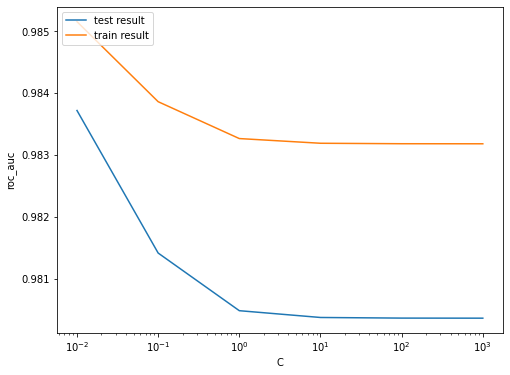

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9837192853831933 at C = 0.01


#### Logistic regression with optimal C

In [ ]:
# Instantiate the model with best C
logistic_imb = LogisticRegression(C=0.01)

In [ ]:
# Fit the model on the train set
logistic_imb_model = logistic_imb.fit(X_train, y_train)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = logistic_imb_model.predict(X_train)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227427     22]
 [   135    261]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9993109350655051
Sensitivity:- 0.6590909090909091
Specificity:- 0.9999032750198946
F1-Score:- 0.7687776141384388


In [ ]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.92      0.66      0.77       396

    accuracy                           1.00    227845
   macro avg       0.96      0.83      0.88    227845
weighted avg       1.00      1.00      1.00    227845



##### ROC on the train set

In [ ]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
# Predicted probability
y_train_pred_proba = logistic_imb_model.predict_proba(X_train)[:,1]

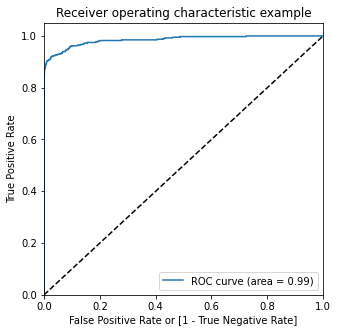

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

We acheived very good ROC 0.99 on the train set.

#### Prediction on the test set

In [ ]:
# Prediction on the test set
y_test_pred = logistic_imb_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56850    16]
 [   42    54]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9989817773252344
Sensitivity:- 0.5625
Specificity:- 0.9997186367952731
F1-Score:- 0.6506024096385543


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.77      0.56      0.65        96

    accuracy                           1.00     56962
   macro avg       0.89      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962



##### ROC on the test set

In [ ]:
# Predicted probability
y_test_pred_proba = logistic_imb_model.predict_proba(X_test)[:,1]

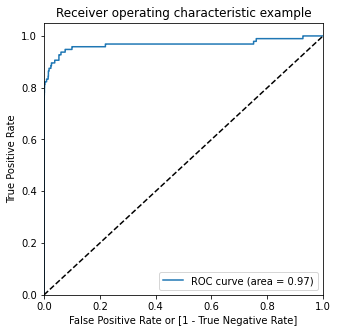

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

We can see that we have very good ROC on the test set 0.97, which is almost close to 1.

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 0.65
    - Specificity = 0.99
    - F1-Score = 0.76
    - ROC = 0.99
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.56
    - Specificity = 0.99
    - F1-Score = 0.65
    - ROC = 0.97

After learning from the train set, the model is generally doing well in the test set.

### XGBoost

In [ ]:
# Importing XGBoost
from xgboost import XGBClassifier

##### Tuning the hyperparameters

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,30.877771,0.964568,0.348954,0.007253,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.979854,0.971801,0.981423,0.977693,0.004215,1,0.999894,0.999940,0.999847,0.999894,0.000038
1,38.282201,0.372209,0.348359,0.003315,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.976568,0.972788,0.977688,0.975682,0.002096,3,0.999965,0.999987,0.999966,0.999973,0.000010
2,41.341132,0.475329,0.349239,0.008921,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.978125,0.970882,0.980136,0.976381,0.003974,2,0.999950,0.999983,0.999911,0.999948,0.000029
3,29.977954,0.243168,0.371258,0.004929,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.968098,0.974481,0.973309,0.971963,0.002774,6,1.000000,1.000000,0.999995,0.999998,0.000002
4,37.965570,0.376452,0.361588,0.003770,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.968621,0.965527,0.982247,0.972132,0.007263,5,1.000000,1.000000,1.000000,1.000000,0.000000
5,40.312068,0.399334,0.364740,0.010168,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.972799,0.973557,0.974113,0.973489,0.000539,4,1.000000,1.000000,1.000000,1.000000,0.000000


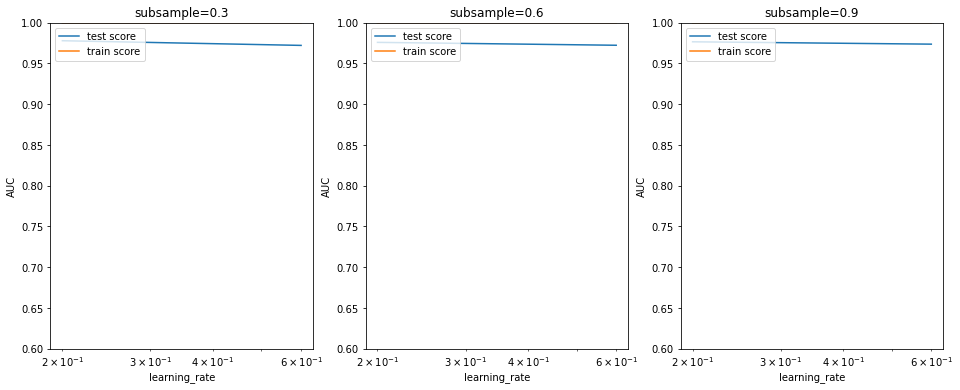

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### Model with optimal hyperparameters
It is evident that the train score is very close to 1. The optimal hyperparameters are subsample: 0.3 and learning_rate: 0.2 among the available options.

In [ ]:
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.3}

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

XGBClassifier(params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9})

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[227436     13]
 [    59    337]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9996839956988304
Sensitivity:- 0.851010101010101
Specificity:- 0.9999428443299377
F1-Score:- 0.9034852546916889


In [ ]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.96      0.85      0.90       396

    accuracy                           1.00    227845
   macro avg       0.98      0.93      0.95    227845
weighted avg       1.00      1.00      1.00    227845



In [ ]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb)
auc

0.997010146707991

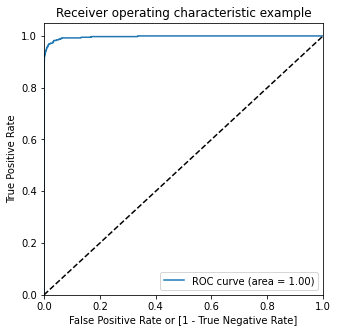

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56852    14]
 [   23    73]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, y_test_pred))

Accuracy:- 0.9993504441557529
Sensitivity:- 0.7604166666666666
Specificity:- 0.9997538071958639
F1-Score:- 0.7978142076502732


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.84      0.76      0.80        96

    accuracy                           1.00     56962
   macro avg       0.92      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9762384560487227

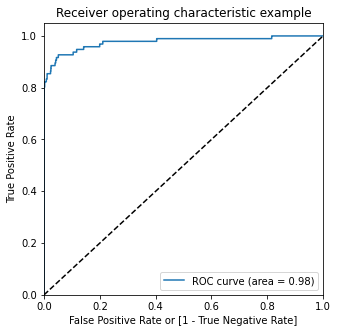

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 0.85
    - Specificity = 0.99
    - ROC-AUC = 0.99
    - F1-Score = 0.90
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.75
    - Specificity = 0.99
    - ROC-AUC = 0.98
    - F-Score = 0.79

Overall, the model is performing well in the test set, what it had learnt from the train set.

### Decision Tree

In [ ]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.189008,0.057879,0.022756,0.001843,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933337,0.933180,0.923871,0.930129,0.004426,5
1,3.559126,0.487599,0.021294,0.000437,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.933337,0.933183,0.923883,0.930134,0.004421,4
2,3.150120,0.019056,0.021462,0.000092,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933297,0.936720,0.944598,0.938205,0.004732,1
3,3.651400,0.584631,0.022432,0.000994,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.933282,0.936720,0.944598,0.938200,0.004737,2
4,6.548986,0.334815,0.028402,0.004852,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.917519,0.923884,0.937995,0.926466,0.008556,7
5,6.240720,0.034577,0.023522,0.001313,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.924926,0.923898,0.937956,0.928927,0.006398,6
6,6.196970,0.092603,0.024748,0.000961,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.933450,0.919703,0.921766,0.924973,0.006053,8
7,6.193424,0.074439,0.023636,0.000587,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.933438,0.919682,0.944083,0.932401,0.009989,3


In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9382050164508641
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


In [ ]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=5,
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=100,
                       random_state=100)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = dt_imb_model.predict(X_train)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[227449      0]
 [     0    396]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9991704887094297
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.7490039840637449


In [ ]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.79      0.71      0.75       396

    accuracy                           1.00    227845
   macro avg       0.89      0.86      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [ ]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.9534547393930157

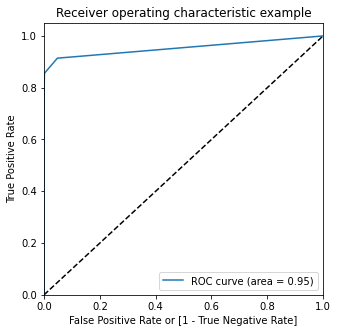

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)


##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_pred = dt_imb_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56836    30]
 [   40    56]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9987711105649381
Sensitivity:- 0.5833333333333334
Specificity:- 0.9994724439911371
F1-Score:- 0.7490039840637449


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.65      0.58      0.62        96

    accuracy                           1.00     56962
   macro avg       0.83      0.79      0.81     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.92174979703748

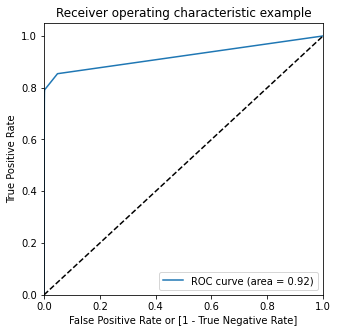

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 1.0
    - F1-Score = 0.75
    - ROC-AUC = 0.95
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.58
    - Specificity = 0.99
    - F-1 Score = 0.75
    - ROC-AUC = 0.92


### Random forest

In [ ]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300],
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf,
                           param_grid = param_grid,
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1,
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)


Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.999280212232471 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 200}


In [ ]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50,
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

In [ ]:
# Fit the model
rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = rfc_imb_model.predict(X_train)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train)
print(confusion)

[[227449      0]
 [     0    396]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9993723803462881
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.8059701492537312


In [ ]:
# classification_report
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       0.87      0.75      0.81       396

    accuracy                           1.00    227845
   macro avg       0.94      0.87      0.90    227845
weighted avg       1.00      1.00      1.00    227845



In [ ]:
# Predicted probability
y_train_pred_proba = rfc_imb_model.predict_proba(X_train)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train, y_train_pred_proba)
auc

0.976343869916715

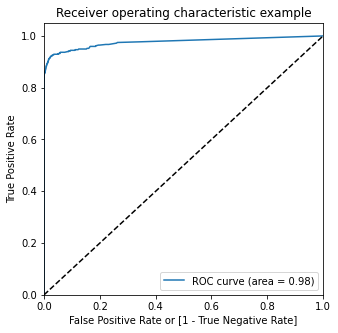

In [ ]:
# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_pred = rfc_imb_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56842    24]
 [   34    62]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train, y_train_pred))

Accuracy:- 0.9989817773252344
Sensitivity:- 0.6458333333333334
Specificity:- 0.9995779551929096
F1-Score:- 0.8059701492537312


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.72      0.65      0.68        96

    accuracy                           1.00     56962
   macro avg       0.86      0.82      0.84     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Predicted probability
y_test_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9571046590522752

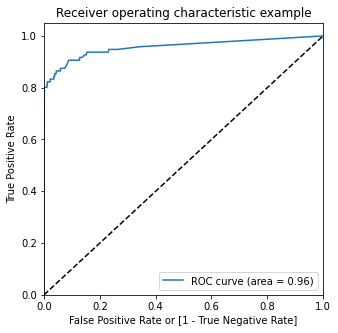

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 1.0
    - F1-Score = 0.80
    - ROC-AUC = 0.97
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.64
    - Specificity = 0.99
    - F-1 Score = 0.80
    - ROC-AUC = 0.95

### Choosing best model on the imbalanced data

It is evident that nearly every model we tested—Logistic, XGBoost, Decision Tree, and Random Forest—performed admirably. More precisely, in terms of ROC-AUC score, the best performing algorithms were XGBoost and logistic regression.

However, since we must select one, we can choose XGBoost, which provides a ROC score of 0.97 for the test data and 0.99 for the train data.

Remember that the XGBoost model uses more resources than the Logistic model. Therefore, it costs more to build the XGBoost model than the logistic model. However, XGBoost outperforms the logistic model by 0.01 with a ROC score of 0.98. The bank may save a significant amount of money thanks to the 0.01 score increase.

#### Print the important features of the best model to understand the dataset
This will assist us in determining whether the dataset is not PCA transformed, but it won't provide much explanation for the already transformed dataset.

Top var = 17
2nd Top var = 14
3rd Top var = 10


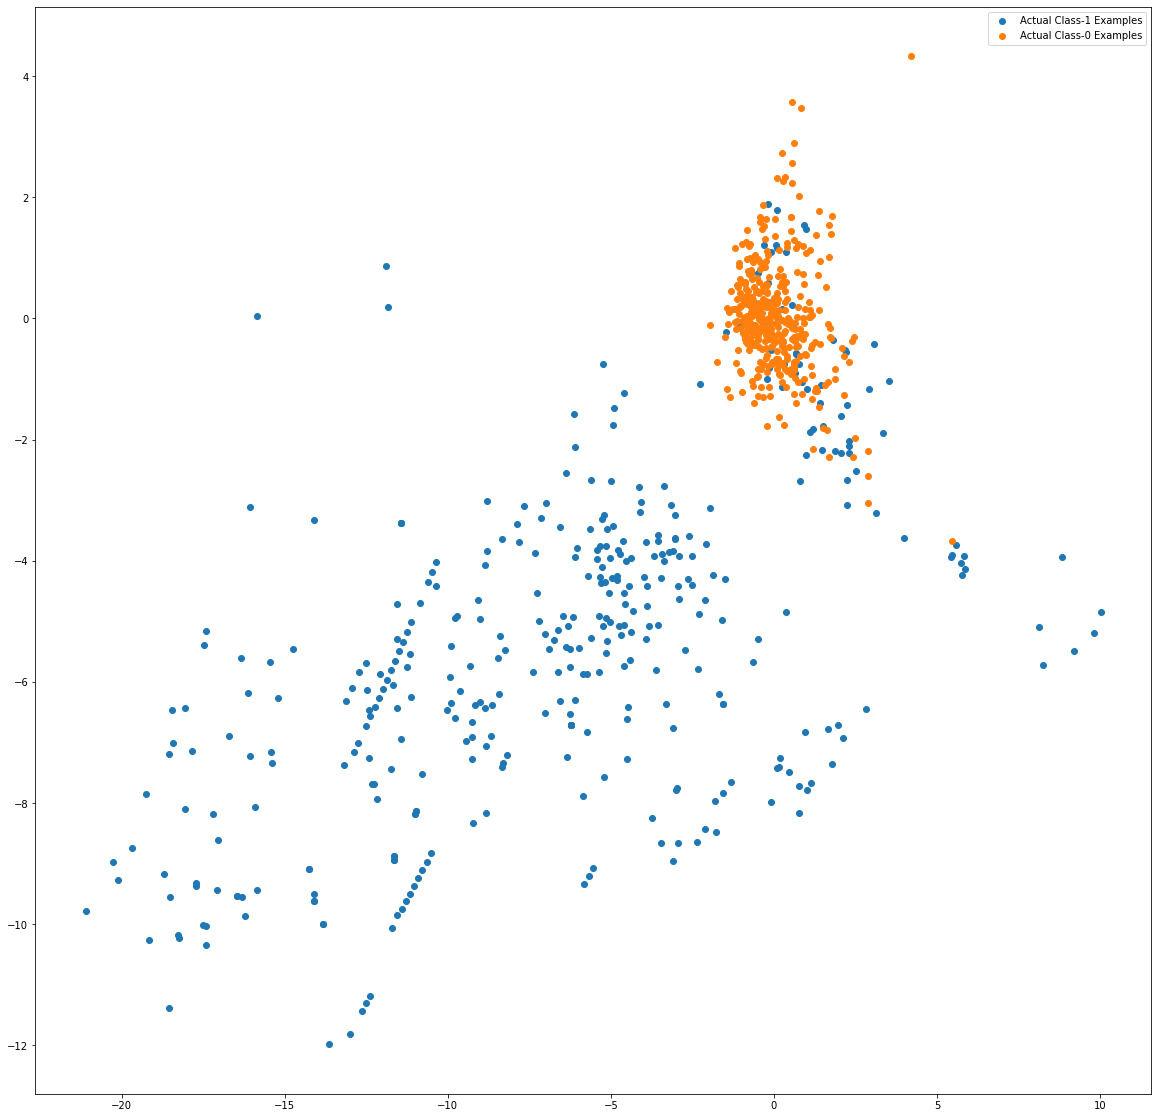

In [ ]:
# Features of XGBoost model

var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)
# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

#### Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [ ]:
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.997010146707991
Threshold= 0.001649919


We can see that the threshold is 0.85, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

# Handling data imbalance
Given the extreme imbalance in the data, we will attempt a number of different approaches to address the imbalance.

- Undersampling: In this case, the count of non-fraudulent transactions will be lowered to 396 (a comparable number of fraudulent transactions) in order to balance the class distribution.
- Oversampling: In this case, we'll count both fraudulent and non-fraudulent transactions equally.
SMOTE stands for synthetic minority oversampling. This is an additional oversampling method that generates synthetic data using the nearest neighbor algorithm.
With a few minor modifications, Adasyn is comparable to SMOTE in that new synthetic data is generated on the low density region of imbalanced data points..

## Undersampling

In [ ]:
# Importing undersampler library
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [ ]:
# instantiating the random undersampler
rus = RandomUnderSampler()
# resampling X, y
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)

In [ ]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_train_rus))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 396, 1: 396})


## Model building on balanced data with Undersampling

### Logistic Regression

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_rus, y_train_rus)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.013273,0.003850,0.003794,0.001087,0.01,{'C': 0.01},0.982353,0.995252,0.967468,0.980439,0.985334,0.982169,0.008948,1,0.988766,0.985804,0.991302,0.988337,0.987865,0.988415,0.001766
1,0.012385,0.002868,0.003015,0.000124,0.1,{'C': 0.1},0.982989,0.995093,0.963301,0.978195,0.983400,0.980596,0.010282,2,0.990653,0.987831,0.993750,0.990317,0.990981,0.990706,0.001885
2,0.015356,0.001715,0.003444,0.000459,1,{'C': 1},0.982989,0.994460,0.958173,0.970178,0.981467,0.977453,0.012334,3,0.991123,0.988380,0.994646,0.991342,0.991757,0.991450,0.001993
3,0.018301,0.001379,0.003245,0.000157,10,{'C': 10},0.979491,0.995252,0.955449,0.966651,0.981467,0.975662,0.013579,4,0.991442,0.988490,0.994686,0.991700,0.992096,0.991683,0.001972
4,0.029075,0.011841,0.003493,0.000060,100,{'C': 100},0.977107,0.995252,0.953526,0.965368,0.981628,0.974576,0.014223,5,0.991422,0.988470,0.994487,0.991989,0.991956,0.991665,0.001920
5,0.030880,0.013533,0.003424,0.000154,1000,{'C': 1000},0.976948,0.995252,0.953045,0.965528,0.981467,0.974448,0.014324,6,0.991412,0.988410,0.994467,0.992059,0.991917,0.991653,0.001935


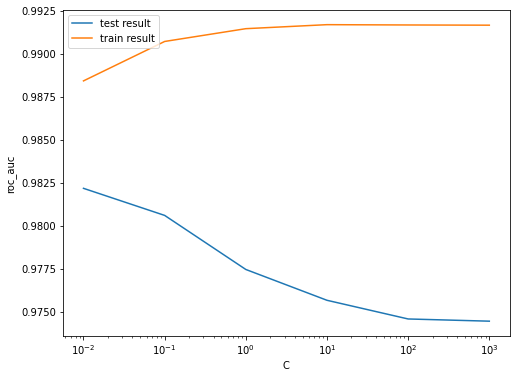

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9821692546642184 at C = 0.01


#### Logistic regression with optimal C

In [ ]:
# Instantiate the model with best C
logistic_bal_rus = LogisticRegression(C=0.1)

In [ ]:
# Fit the model on the train set
logistic_bal_rus_model = logistic_bal_rus.fit(X_train_rus, y_train_rus)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = logistic_bal_rus_model.predict(X_train_rus)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[389   7]
 [ 31 365]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_rus, y_train_pred))

Accuracy:- 0.952020202020202
Sensitivity:- 0.9217171717171717
Specificity:- 0.9823232323232324
F1-Score:- 0.9505208333333334


In [ ]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       396
           1       0.98      0.92      0.95       396

    accuracy                           0.95       792
   macro avg       0.95      0.95      0.95       792
weighted avg       0.95      0.95      0.95       792



In [ ]:
# Predicted probability
y_train_pred_proba = logistic_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9900010203040506

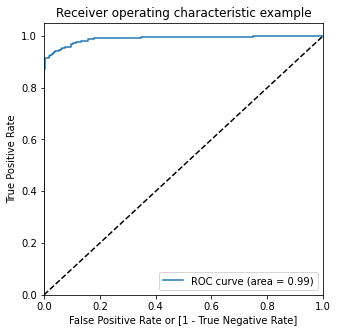

In [ ]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

#### Prediction on the test set

In [ ]:
# Prediction on the test set
y_test_pred = logistic_bal_rus_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55489  1377]
 [   12    84]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9756153224956989
Sensitivity:- 0.875
Specificity:- 0.975785179193191


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.88      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [ ]:
# Predicted probability
y_test_pred_proba = logistic_bal_rus_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9711809707616738

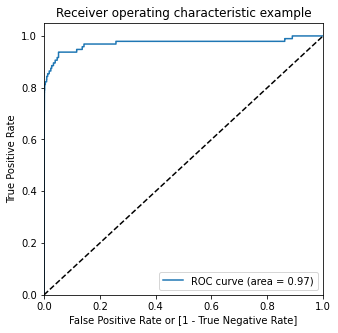

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.95
    - Sensitivity = 0.92
    - Specificity = 0.98
    - ROC = 0.99
- Test set
    - Accuracy = 0.97
    - Sensitivity = 0.87
    - Specificity = 0.97
    - ROC = 0.97

### XGBoost

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_rus, y_train_rus)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,0.090248,0.001919,0.003579,0.000053,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.968664,0.965680,0.980716,0.971687,0.006500,4,0.999828,0.999986,1.000000,0.999938,0.000078
1,0.113862,0.004853,0.003567,0.000130,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.972911,0.963900,0.982151,0.972987,0.007451,3,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.117046,0.003035,0.003652,0.000169,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.978363,0.966942,0.980774,0.975360,0.006033,2,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.077188,0.002923,0.003181,0.000207,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.964245,0.962580,0.971935,0.966253,0.004075,6,1.000000,0.999871,0.999943,0.999938,0.000053
4,0.091385,0.004356,0.003554,0.000559,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.975436,0.972854,0.981348,0.976546,0.003555,1,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.094093,0.001134,0.003175,0.000135,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.970443,0.967860,0.975034,0.971113,0.002967,5,1.000000,1.000000,1.000000,1.000000,0.000000


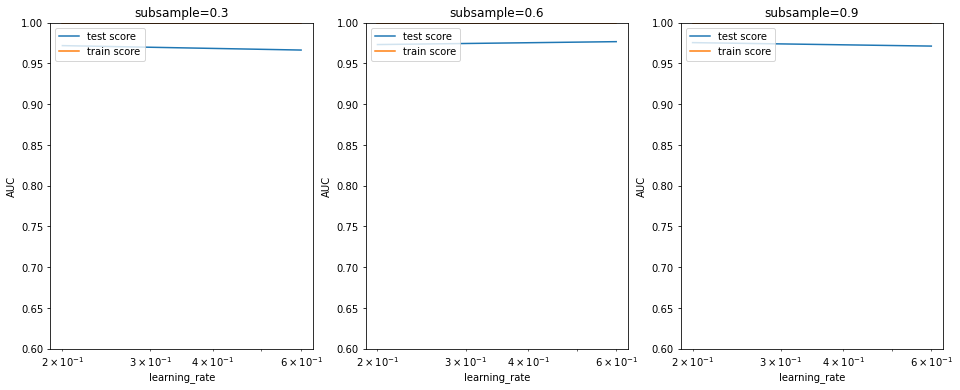

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [ ]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_rus_model = XGBClassifier(params = params)
xgb_bal_rus_model.fit(X_train_rus, y_train_rus)

XGBClassifier(params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6})

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = xgb_bal_rus_model.predict(X_train_rus)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_rus)
print(confusion)

[[396   0]
 [  0 396]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9974747474747475
Sensitivity:- 1.0
Specificity:- 1.0


In [ ]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       396
           1       1.00      1.00      1.00       396

    accuracy                           1.00       792
   macro avg       1.00      1.00      1.00       792
weighted avg       1.00      1.00      1.00       792



In [ ]:
# Predicted probability
y_train_pred_proba = xgb_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9999872461993674

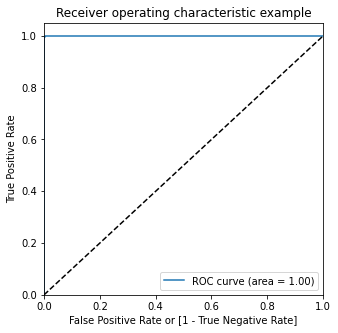

In [ ]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_pred = xgb_bal_rus_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[54837  2029]
 [   10    86]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9642042063129805
Sensitivity:- 0.8958333333333334
Specificity:- 0.9643196286005697


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56866
           1       0.04      0.90      0.08        96

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.96      0.98     56962



In [ ]:
# Predicted probability
y_test_pred_proba = xgb_bal_rus_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9772469489677489

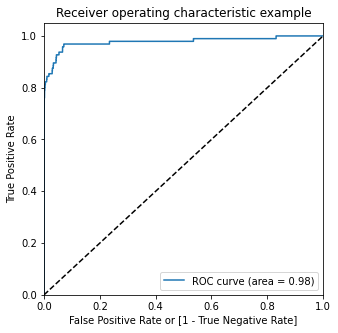

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 1.0
    - Sensitivity = 1.0
    - Specificity = 1.0
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.96
    - Sensitivity = 0.85
    - Specificity = 0.96
    - ROC-AUC = 0.97

### Decision Tree

In [ ]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_rus,y_train_rus)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.008538,0.001050,0.003597,0.000195,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.955062,0.955234,0.966483,0.958926,0.005344,3
1,0.006985,0.000305,0.003216,0.000056,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.954345,0.956038,0.964073,0.958152,0.004243,4
2,0.005516,0.000250,0.003205,0.000323,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.946023,0.936410,0.956784,0.946405,0.008322,8
3,0.005598,0.000345,0.003160,0.000455,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.946023,0.944789,0.956612,0.949141,0.005306,5
4,0.006666,0.000251,0.003064,0.000196,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.955062,0.961892,0.964245,0.960399,0.003894,1
5,0.006590,0.000073,0.003011,0.000061,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.954488,0.960629,0.962867,0.959328,0.003542,2
6,0.006595,0.001783,0.003635,0.000898,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.946023,0.944674,0.956439,0.949045,0.005257,6
7,0.005250,0.000144,0.002948,0.000137,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.945879,0.944215,0.956439,0.948845,0.005413,7


In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9603994490358128
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [ ]:
# Model with optimal hyperparameters
dt_bal_rus_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=5,
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_bal_rus_model.fit(X_train_rus, y_train_rus)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = dt_bal_rus_model.predict(X_train_rus)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[387   9]
 [ 47 349]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9292929292929293
Sensitivity:- 0.8813131313131313
Specificity:- 0.9772727272727273


In [ ]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       396
           1       0.97      0.88      0.93       396

    accuracy                           0.93       792
   macro avg       0.93      0.93      0.93       792
weighted avg       0.93      0.93      0.93       792



In [ ]:
# Predicted probability
y_train_pred_proba = dt_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9799988521579431

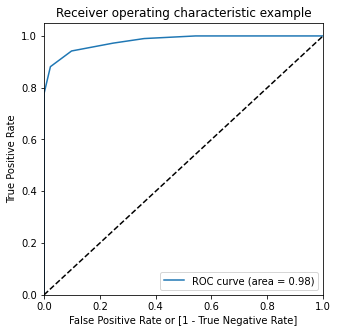

In [ ]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_pred = dt_bal_rus_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55086  1780]
 [   16    80]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9684702082089814
Sensitivity:- 0.8333333333333334
Specificity:- 0.9686983434741322


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56866
           1       0.04      0.83      0.08        96

    accuracy                           0.97     56962
   macro avg       0.52      0.90      0.53     56962
weighted avg       1.00      0.97      0.98     56962



In [ ]:
# Predicted probability
y_test_pred_proba = dt_bal_rus_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.955534172440474

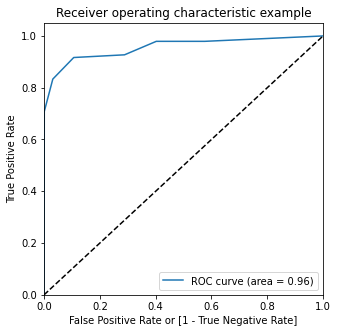

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.92
    - Sensitivity = 0.88
    - Specificity = 0.97
    - ROC-AUC = 0.97
- Test set
    - Accuracy = 0.96
    - Sensitivity = 0.85
    - Specificity = 0.96
    - ROC-AUC = 0.96

### Random forest

In [ ]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300],
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1,
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_rus, y_train_rus)


Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get roc-auc of',grid_search.best_score_,'using',grid_search.best_params_)

We can get roc-auc of 0.9761631466176921 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 100, 'n_estimators': 200}


In [ ]:
# model with the best hyperparameters

rfc_bal_rus_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50,
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=200)

In [ ]:
# Fit the model
rfc_bal_rus_model.fit(X_train_rus, y_train_rus)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50, n_estimators=200)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = rfc_bal_rus_model.predict(X_train_rus)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_rus, y_train_pred)
print(confusion)

[[393   3]
 [ 43 353]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_rus, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_rus, y_train_pred))

Accuracy:- 0.9419191919191919
Sensitivity:- 0.8914141414141414
Specificity:- 0.9924242424242424
F1-Score:- 0.9388297872340426


In [ ]:
# classification_report
print(classification_report(y_train_rus, y_train_pred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94       396
           1       0.99      0.89      0.94       396

    accuracy                           0.94       792
   macro avg       0.95      0.94      0.94       792
weighted avg       0.95      0.94      0.94       792



In [ ]:
# Predicted probability
y_train_pred_proba = rfc_bal_rus_model.predict_proba(X_train_rus)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_rus, y_train_pred_proba)
auc

0.9858496581981431

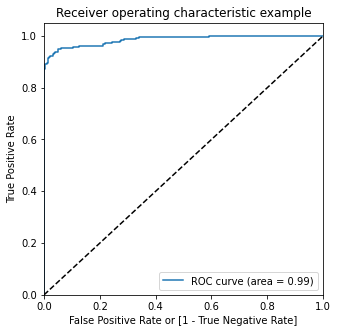

In [ ]:
# Plot the ROC curve
draw_roc(y_train_rus, y_train_pred_proba)

##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_pred = rfc_bal_rus_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55884   982]
 [   18    78]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9824444366419718
Sensitivity:- 0.8125
Specificity:- 0.9827313333098864


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.07      0.81      0.13        96

    accuracy                           0.98     56962
   macro avg       0.54      0.90      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [ ]:
# Predicted probability
y_test_pred_proba = rfc_bal_rus_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.97373531269417

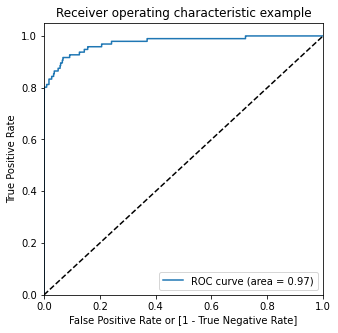

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.94
    - Sensitivity = 0.89
    - Specificity = 0.99
    - ROC-AUC = 0.98
- Test set
    - Accuracy = 0.98
    - Sensitivity = 0.81
    - Specificity = 0.98
    - ROC-AUC = 0.93

# Oversampling

In [ ]:
# Importing oversampler library
from imblearn.over_sampling import RandomOverSampler

In [ ]:
# instantiating the random oversampler
ros = RandomOverSampler()
# resampling X, y
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

In [ ]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_train_ros))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227449})


### Logistic Regression

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_ros, y_train_ros)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.269350,0.155445,0.038169,0.000616,0.01,{'C': 0.01},0.988879,0.988633,0.988389,0.988347,0.988645,0.988578,0.000193,6,0.988589,0.988565,0.988560,0.988691,0.988573,0.988596,0.000049
1,2.323991,0.070569,0.037026,0.000519,0.1,{'C': 0.1},0.988901,0.988654,0.988391,0.988345,0.988664,0.988591,0.000203,1,0.988609,0.988577,0.988571,0.988701,0.988587,0.988609,0.000048
2,2.390859,0.128788,0.036680,0.000350,1,{'C': 1},0.988900,0.988652,0.988390,0.988343,0.988666,0.988590,0.000204,4,0.988611,0.988578,0.988570,0.988700,0.988586,0.988609,0.000048
3,2.371447,0.115337,0.038221,0.001578,10,{'C': 10},0.988901,0.988652,0.988390,0.988342,0.988666,0.988590,0.000204,5,0.988611,0.988578,0.988571,0.988700,0.988586,0.988609,0.000047
4,2.387795,0.127640,0.037352,0.000706,100,{'C': 100},0.988901,0.988652,0.988390,0.988343,0.988667,0.988590,0.000204,2,0.988611,0.988578,0.988571,0.988700,0.988586,0.988609,0.000047
5,2.367973,0.116267,0.036521,0.000460,1000,{'C': 1000},0.988901,0.988652,0.988390,0.988342,0.988667,0.988590,0.000204,3,0.988611,0.988578,0.988571,0.988700,0.988586,0.988609,0.000047


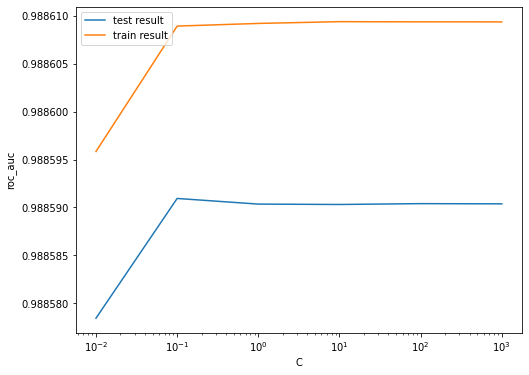

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9885909420333661 at C = 0.1


#### Logistic regression with optimal C

In [ ]:
# Instantiate the model with best C
logistic_bal_ros = LogisticRegression(C=0.1)

In [ ]:
# Fit the model on the train set
logistic_bal_ros_model = logistic_bal_ros.fit(X_train_ros, y_train_ros)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = logistic_bal_ros_model.predict(X_train_ros)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[222253   5196]
 [ 17203 210246]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_ros, y_train_pred))

Accuracy:- 0.9507603902413289
Sensitivity:- 0.9243654621475583
Specificity:- 0.9771553183350993
F1-Score:- 0.949425479406897


In [ ]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.98      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



In [ ]:
# Predicted probability
y_train_pred_proba = logistic_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9886049203587108

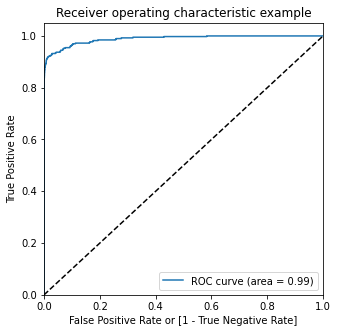

In [ ]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

#### Prediction on the test set

In [ ]:
# Prediction on the test set
y_test_pred = logistic_bal_ros_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55535  1331]
 [   11    85]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9764404339735262
Sensitivity:- 0.8854166666666666
Specificity:- 0.9765940984067809


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.06      0.89      0.11        96

    accuracy                           0.98     56962
   macro avg       0.53      0.93      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [ ]:
# Predicted probability
y_test_pred_proba = logistic_bal_ros_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9711520284528541

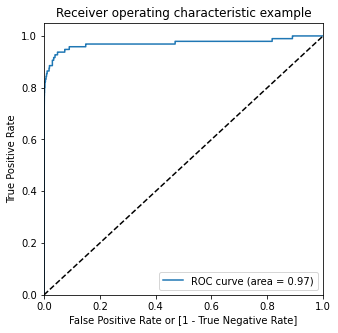

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.95
    - Sensitivity = 0.8
    - Specificity = 0.97
    - ROC = 0.98
- Test set
    - Accuracy = 0.97
    - Sensitivity = 0.88
    - Specificity = 0.97
    - ROC = 0.97

### XGBoost

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_ros, y_train_ros)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,57.388203,1.115573,0.712452,0.028118,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999920,0.999925,0.999913,0.999919,0.000005,4,0.999928,0.999934,0.999937,0.999933,3.775174e-06
1,66.232238,0.126410,0.702159,0.013864,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999905,0.999927,0.999907,0.999913,0.000010,5,0.999919,0.999934,0.999929,0.999927,6.205528e-06
2,68.186963,1.196040,0.709698,0.026760,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999905,0.999927,0.999898,0.999910,0.000012,6,0.999918,0.999930,0.999920,0.999923,5.397359e-06
3,56.332628,1.045007,0.707109,0.009715,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999987,0.999976,0.999984,0.999982,0.000004,3,0.999991,0.999993,1.000000,0.999995,3.868798e-06
4,66.018796,1.125217,0.710466,0.004965,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999989,0.999990,0.999976,0.999985,0.000006,2,0.999999,1.000000,0.999999,0.999999,2.666452e-07
5,66.865402,1.409143,0.710275,0.020957,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999997,0.999988,0.999980,0.999989,0.000007,1,0.999998,0.999999,1.000000,0.999999,9.155369e-07


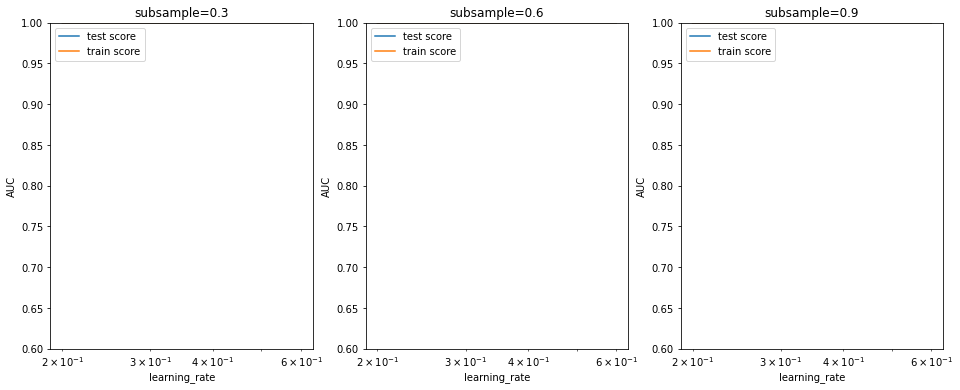

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [ ]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [ ]:
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_ros_model = XGBClassifier(params = params)
xgb_bal_ros_model.fit(X_train_ros, y_train_ros)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9})

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = xgb_bal_ros_model.predict(X_train_ros)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_ros)
print(confusion)

[[227449      0]
 [     0 227449]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9966915660213939
Sensitivity:- 1.0
Specificity:- 1.0


In [ ]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227449
           1       1.00      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [ ]:
# Predicted probability
y_train_pred_proba = xgb_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9997802911479783

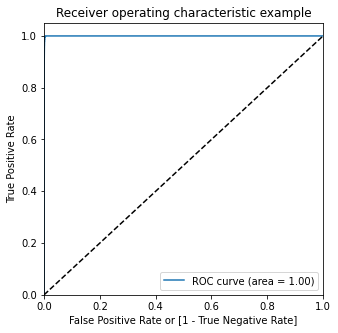

In [ ]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_pred = xgb_bal_ros_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56584   282]
 [   18    78]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9947333309925915
Sensitivity:- 0.8125
Specificity:- 0.9950409735166884


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56866
           1       0.22      0.81      0.34        96

    accuracy                           0.99     56962
   macro avg       0.61      0.90      0.67     56962
weighted avg       1.00      0.99      1.00     56962



In [ ]:
# Predicted probability
y_test_pred_proba = xgb_bal_ros_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9711434190318762

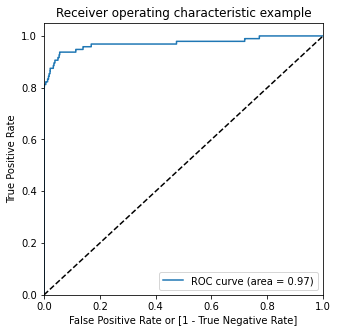

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 1.0
    - ROC-AUC = 1.0
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.81
    - Specificity = 0.99
    - ROC-AUC = 0.97

### Decision Tree

In [ ]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_ros,y_train_ros)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,3.885966,0.050274,0.046109,0.000664,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.990320,0.991264,0.990513,0.990699,0.000407,5
1,3.840654,0.036101,0.045289,0.001690,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.990320,0.991264,0.990502,0.990696,0.000409,6
2,3.822812,0.020730,0.045508,0.000810,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.990305,0.991192,0.990422,0.990640,0.000394,7
3,3.803006,0.025994,0.045191,0.000482,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.990305,0.991182,0.990422,0.990636,0.000389,8
4,6.447252,0.865829,0.053137,0.009270,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999535,0.999690,0.999592,0.999606,0.000064,2
5,5.953388,0.206566,0.045869,0.000646,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.999548,0.999690,0.999584,0.999607,0.000060,1
6,5.852360,0.044765,0.045709,0.000638,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999667,0.999664,0.999480,0.999604,0.000087,3
7,6.136759,0.460955,0.050068,0.005238,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.999627,0.999654,0.999500,0.999594,0.000067,4


In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9996070905508657
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [ ]:
# Model with optimal hyperparameters
dt_bal_ros_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_ros_model.fit(X_train_ros, y_train_ros)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = dt_bal_ros_model.predict(X_train_ros)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_ros, y_train_pred)
print(confusion)

[[225799   1650]
 [     0 227449]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_ros, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9963728132460463
Sensitivity:- 1.0
Specificity:- 0.9927456264920927


In [ ]:
# classification_report
print(classification_report(y_train_ros, y_train_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00    227449
           1       0.99      1.00      1.00    227449

    accuracy                           1.00    454898
   macro avg       1.00      1.00      1.00    454898
weighted avg       1.00      1.00      1.00    454898



In [ ]:
# Predicted probability
y_train_pred_proba = dt_bal_ros_model.predict_proba(X_train_ros)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_ros, y_train_pred_proba)
auc

0.9997542553534048

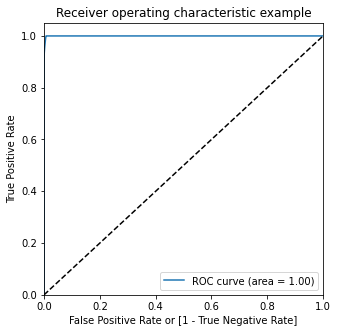

In [ ]:
# Plot the ROC curve
draw_roc(y_train_ros, y_train_pred_proba)

##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_pred = dt_bal_ros_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56412   454]
 [   21    75]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9916611074049366
Sensitivity:- 0.78125
Specificity:- 0.9920163190658742


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56866
           1       0.14      0.78      0.24        96

    accuracy                           0.99     56962
   macro avg       0.57      0.89      0.62     56962
weighted avg       1.00      0.99      0.99     56962



In [ ]:
# Predicted probability
y_test_pred_proba = dt_bal_ros_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.8896122939600698

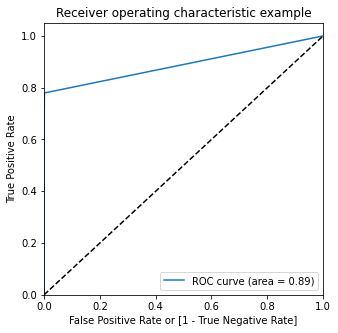

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.99
    - Sensitivity = 1.0
    - Specificity = 0.99
    - ROC-AUC = 0.99
- Test set
    - Accuracy = 0.99
    - Sensitivity = 0.79
    - Specificity = 0.99
    - ROC-AUC = 0.88

## SMOTE (Synthetic Minority Oversampling Technique)

We are creating synthetic samples by doing upsampling using SMOTE(Synthetic Minority Oversampling Technique).

In [ ]:
# Importing SMOTE
from imblearn.over_sampling import SMOTE


In [ ]:
# Instantiate SMOTE
sm = SMOTE(random_state=27)
# Fitting SMOTE to the train
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

In [ ]:
print('Before SMOTE oversampling X_train shape=',X_train.shape)
print('After SMOTE oversampling X_train shape=',X_train_smote.shape)

Before SMOTE oversampling X_train shape= (227845, 29)
After SMOTE oversampling X_train shape= (454898, 29)


### Logistic Regression

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.028954,0.059954,0.041047,0.002808,0.01,{'C': 0.01},0.989805,0.989796,0.989484,0.989631,0.989910,0.989725,0.000150,6,0.989758,0.989666,0.989760,0.989841,0.989682,0.989741,0.000063
1,2.052682,0.103086,0.042338,0.005753,0.1,{'C': 0.1},0.989834,0.989807,0.989488,0.989632,0.989942,0.989741,0.000161,1,0.989780,0.989686,0.989772,0.989853,0.989700,0.989758,0.000060
2,2.108011,0.048386,0.039515,0.000616,1,{'C': 1},0.989836,0.989807,0.989486,0.989630,0.989944,0.989741,0.000162,2,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060
3,2.104106,0.079993,0.039210,0.000968,10,{'C': 10},0.989836,0.989807,0.989486,0.989630,0.989945,0.989741,0.000163,5,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060
4,2.703943,0.641875,0.047963,0.016757,100,{'C': 100},0.989836,0.989807,0.989486,0.989630,0.989945,0.989741,0.000163,3,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060
5,2.135273,0.072349,0.044092,0.006135,1000,{'C': 1000},0.989836,0.989807,0.989486,0.989630,0.989945,0.989741,0.000163,4,0.989781,0.989687,0.989772,0.989852,0.989701,0.989758,0.000060


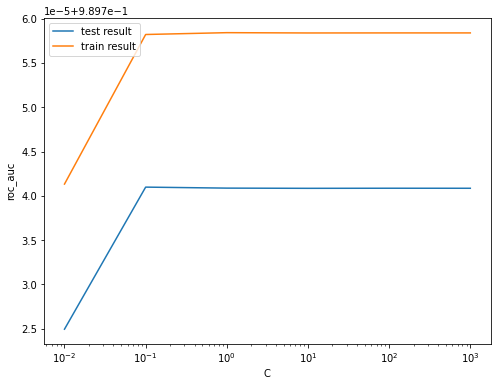

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9897409900830768 at C = 0.1


#### Logistic regression with optimal C

In [ ]:
# Instantiate the model with best C
logistic_bal_smote = LogisticRegression(C=0.1)

In [ ]:
# Fit the model on the train set
logistic_bal_smote_model = logistic_bal_smote.fit(X_train_smote, y_train_smote)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = logistic_bal_smote_model.predict(X_train_smote)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[221911   5538]
 [ 17693 209756]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9489314087993352
Sensitivity:- 0.9222111330452102
Specificity:- 0.9756516845534603


In [ ]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95    227449
           1       0.97      0.92      0.95    227449

    accuracy                           0.95    454898
   macro avg       0.95      0.95      0.95    454898
weighted avg       0.95      0.95      0.95    454898



In [ ]:
# Predicted probability
y_train_pred_proba_log_bal_smote = logistic_bal_smote_model.predict_proba(X_train_smote)[:,1]

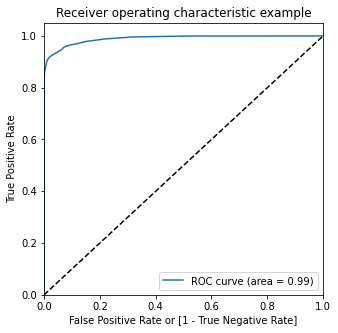

In [ ]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba_log_bal_smote)

#### Prediction on the test set

In [ ]:
# Prediction on the test set
y_test_pred = logistic_bal_smote_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55416  1450]
 [   10    86]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9743688774972789
Sensitivity:- 0.8958333333333334
Specificity:- 0.9745014595716245


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56866
           1       0.06      0.90      0.11        96

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.55     56962
weighted avg       1.00      0.97      0.99     56962



##### ROC on the test set

In [ ]:
# Predicted probability
y_test_pred_proba = logistic_bal_smote_model.predict_proba(X_test)[:,1]

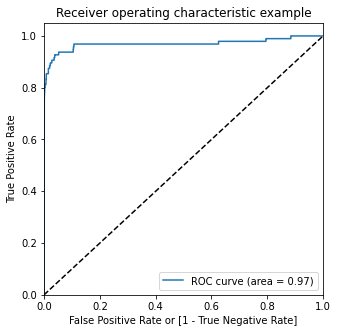

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.94
    - Sensitivity = 0.92
    - Specificity = 0.97
    - ROC = 0.99
- Test set
    - Accuracy = 0.97
    - Sensitivity = 0.89
    - Specificity = 0.97
    - ROC = 0.97

### XGBoost

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,63.428790,0.933743,0.687914,0.006031,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999645,0.999753,0.999685,0.999694,0.000045,4,0.999718,0.999736,0.999720,0.999725,0.000008
1,79.658730,1.014144,0.694385,0.000801,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999671,0.999738,0.999652,0.999687,0.000037,5,0.999733,0.999731,0.999697,0.999721,0.000017
2,85.956938,1.315678,0.705149,0.015338,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999665,0.999735,0.999648,0.999683,0.000038,6,0.999720,0.999723,0.999720,0.999721,0.000001
3,62.503952,0.150822,0.713544,0.003396,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999956,0.999950,0.999953,0.999953,0.000002,3,0.999979,0.999972,0.999977,0.999976,0.000003
4,79.463799,0.940000,0.699781,0.006725,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999953,0.999962,0.999959,0.999958,0.000004,2,0.999980,0.999981,0.999984,0.999982,0.000002
5,85.338740,0.880025,0.705345,0.011786,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999970,0.999958,0.999951,0.999960,0.000008,1,0.999985,0.999981,0.999977,0.999981,0.000003


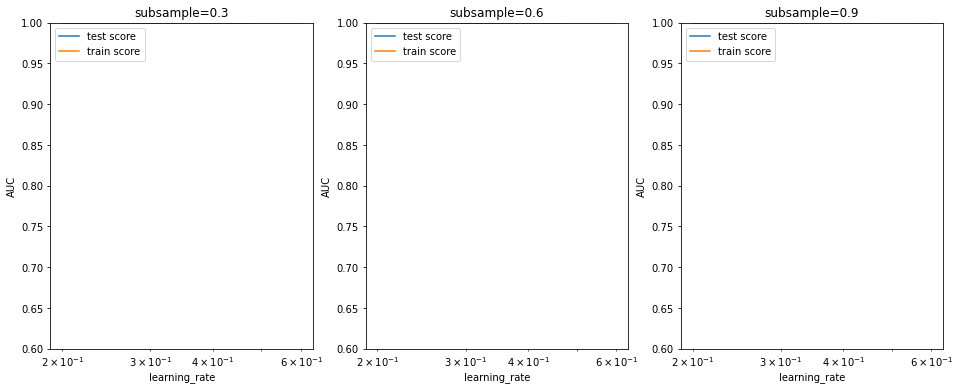

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

##### Model with optimal hyperparameters
We see that the train score almost touches to 1. Among the hyperparameters, we can choose the best parameters as learning_rate : 0.2 and subsample: 0.3

In [ ]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_smote_model = XGBClassifier(params = params)
xgb_bal_smote_model.fit(X_train_smote, y_train_smote)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9})

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = xgb_bal_smote_model.predict(X_train_smote)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[225136   2313]
 [  6803 220646]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9799603427581568
Sensitivity:- 0.970089998197398
Specificity:- 0.9898306873189154


In [ ]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98    227449
           1       0.99      0.97      0.98    227449

    accuracy                           0.98    454898
   macro avg       0.98      0.98      0.98    454898
weighted avg       0.98      0.98      0.98    454898



In [ ]:
# Predicted probability
y_train_pred_proba = xgb_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

0.9989949029022795

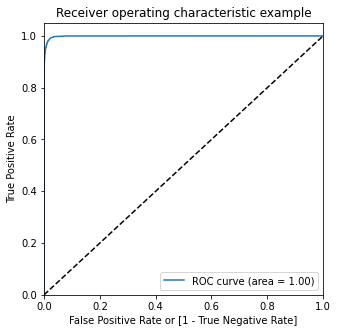

In [ ]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_pred = xgb_bal_smote_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[56208   658]
 [   17    79]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.988149994733331
Sensitivity:- 0.8229166666666666
Specificity:- 0.9884289382056062


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56866
           1       0.11      0.82      0.19        96

    accuracy                           0.99     56962
   macro avg       0.55      0.91      0.59     56962
weighted avg       1.00      0.99      0.99     56962



In [ ]:
# Predicted probability
y_test_pred_proba = xgb_bal_smote_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9699007315443324

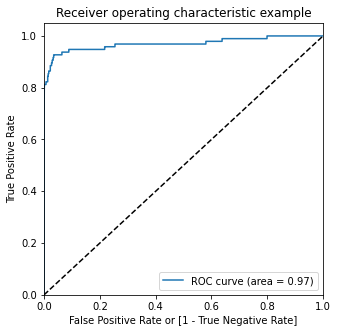

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.97
    - Sensitivity = 0.97
    - Specificity = 0.98
    - ROC-AUC = 0.99
- Test set
    - Accuracy = 0.98
    - Sensitivity = 0.82
    - Specificity = 0.98
    - ROC-AUC = 0.97

Overall, the model is performing well in the test set, what it had learnt from the train set.

### Decision Tree

In [ ]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,6.350272,0.086036,0.044170,0.000059,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.986127,0.985690,0.984839,0.985552,0.000535,5
1,6.486176,0.020060,0.044733,0.000237,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.986127,0.985688,0.984839,0.985551,0.000535,6
2,6.376780,0.093624,0.044812,0.001586,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.986066,0.985640,0.984771,0.985492,0.000539,7
3,6.290278,0.066024,0.044674,0.000570,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.986060,0.985640,0.984773,0.985491,0.000536,8
4,11.716888,0.004443,0.053956,0.004384,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998121,0.998113,0.997887,0.998040,0.000109,2
5,12.200358,1.020010,0.049662,0.003016,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.998181,0.998141,0.997956,0.998093,0.000098,1
6,11.524633,0.091010,0.048476,0.000201,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.998093,0.998110,0.997907,0.998036,0.000092,4
7,11.531241,0.097450,0.048608,0.001766,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.998069,0.998084,0.997959,0.998037,0.000056,3


In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9980926498002024
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)


In [ ]:
# Model with optimal hyperparameters
dt_bal_smote_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_bal_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = dt_bal_smote_model.predict(X_train_smote)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_smote, y_train_pred)
print(confusion)

[[223809   3640]
 [  2374 225075]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_smote, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9867794538555896
Sensitivity:- 0.9895624953286232
Specificity:- 0.9839964123825561


In [ ]:
# classification_report
print(classification_report(y_train_smote, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99    227449
           1       0.98      0.99      0.99    227449

    accuracy                           0.99    454898
   macro avg       0.99      0.99      0.99    454898
weighted avg       0.99      0.99      0.99    454898



In [ ]:
# Predicted probability
y_train_pred_proba = dt_bal_smote_model.predict_proba(X_train_smote)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_smote, y_train_pred_proba)
auc

0.9986355757920081

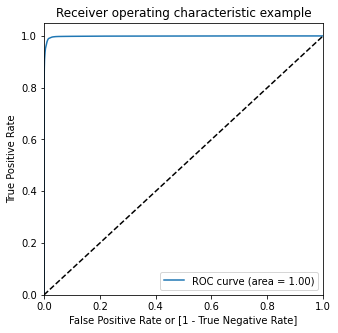

In [ ]:
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_pred = dt_bal_smote_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[55852  1014]
 [   19    77]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9818651030511569
Sensitivity:- 0.8020833333333334
Specificity:- 0.9821686069004326


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56866
           1       0.07      0.80      0.13        96

    accuracy                           0.98     56962
   macro avg       0.54      0.89      0.56     56962
weighted avg       1.00      0.98      0.99     56962



In [ ]:
# Predicted probability
y_test_pred_proba = dt_bal_smote_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.8551876157692353

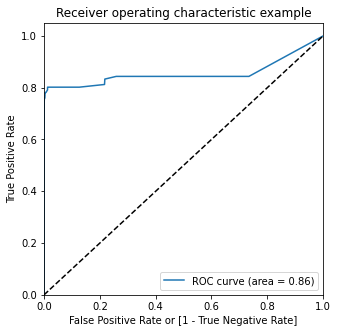

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.98
    - Sensitivity = 0.98
    - Specificity = 0.98
    - ROC-AUC = 0.99
- Test set
    - Accuracy = 0.98
    - Sensitivity = 0.80
    - Specificity = 0.98
    - ROC-AUC = 0.85


## AdaSyn (Adaptive Synthetic Sampling)

In [ ]:
# Importing adasyn
from imblearn.over_sampling import ADASYN

In [ ]:
# Instantiate adasyn
ada = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

In [ ]:
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_train_adasyn))

Before sampling class distribution:- Counter({0: 227449, 1: 396})
New class distribution:- Counter({0: 227449, 1: 227448})


### Logistic Regression

In [ ]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.743159,0.062330,0.071151,0.011411,0.01,{'C': 0.01},0.963472,0.962327,0.963273,0.963024,0.000499,6,0.962770,0.963211,0.963172,0.963051,0.000199
1,1.822924,0.110642,0.061584,0.001086,0.1,{'C': 0.1},0.963578,0.962435,0.963370,0.963128,0.000497,5,0.962881,0.963305,0.963272,0.963153,0.000192
2,1.946678,0.098500,0.064231,0.004521,1,{'C': 1},0.963585,0.962442,0.963376,0.963134,0.000497,4,0.962890,0.963312,0.963278,0.963160,0.000191
3,1.919697,0.082403,0.063705,0.003248,10,{'C': 10},0.963585,0.962443,0.963377,0.963135,0.000496,3,0.962891,0.963312,0.963279,0.963161,0.000191
4,1.843700,0.107333,0.062637,0.002282,100,{'C': 100},0.963585,0.962443,0.963377,0.963135,0.000496,2,0.962891,0.963312,0.963279,0.963161,0.000191
5,1.923959,0.084562,0.064573,0.004997,1000,{'C': 1000},0.963585,0.962443,0.963377,0.963135,0.000496,1,0.962891,0.963312,0.963279,0.963161,0.000191


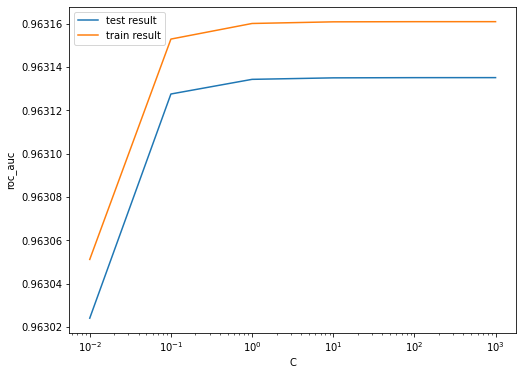

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test roc_auc is {0} at C = {1}".format(best_score, best_C))

 The highest test roc_auc is 0.9631351481659101 at C = 1000


#### Logistic regression with optimal C

In [ ]:
# Instantiate the model with best C
logistic_bal_adasyn = LogisticRegression(C=1000)

In [ ]:
# Fit the model on the train set
logistic_bal_adasyn_model = logistic_bal_adasyn.fit(X_train_adasyn, y_train_adasyn)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = logistic_bal_adasyn_model.predict(X_train_adasyn)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

[[207019  20430]
 [ 31286 196162]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_train_adasyn, y_train_pred))

Accuracy:- 0.8863127257379143
Sensitivity:- 0.862447680348915
Specificity:- 0.9101776662020936
F1-Score:- 0.8835330150436899


In [ ]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89    227449
           1       0.91      0.86      0.88    227448

    accuracy                           0.89    454897
   macro avg       0.89      0.89      0.89    454897
weighted avg       0.89      0.89      0.89    454897



In [ ]:
# Predicted probability
y_train_pred_proba = logistic_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.963161016084171

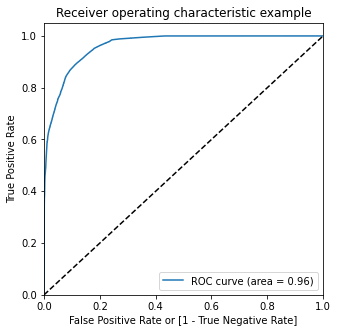

In [ ]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

#### Prediction on the test set

In [ ]:
# Prediction on the test set
y_test_pred = logistic_bal_adasyn_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[51642  5224]
 [    4    92]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9082195147642288
Sensitivity:- 0.9583333333333334
Specificity:- 0.9081349136566665


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.91      0.95     56866
           1       0.02      0.96      0.03        96

    accuracy                           0.91     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.91      0.95     56962



In [ ]:
# Predicted probability
y_test_pred_proba = logistic_bal_adasyn_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9671573487086602

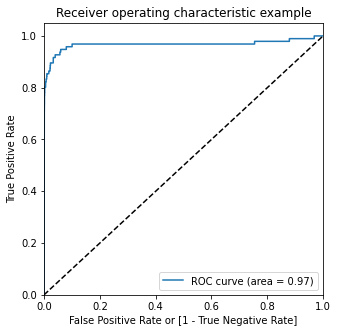

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.88
    - Sensitivity = 0.86
    - Specificity = 0.91
    - ROC = 0.96
- Test set
    - Accuracy = 0.90
    - Sensitivity = 0.95
    - Specificity = 0.90
    - ROC = 0.96

### Decision Tree

In [ ]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,6.057245,0.040013,0.046914,0.001290,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.902958,0.920356,0.908615,0.910643,0.007246,8
1,6.299271,0.338185,0.043402,0.001119,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.902958,0.920355,0.909339,0.910884,0.007186,7
2,6.070468,0.096220,0.042543,0.000213,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.902958,0.920311,0.911441,0.911570,0.007085,6
3,6.241049,0.259622,0.042591,0.000224,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.902958,0.920317,0.912920,0.912065,0.007112,5
4,10.864067,0.212752,0.044536,0.000136,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.935334,0.946312,0.935815,0.939154,0.005066,3
5,10.724392,0.149839,0.043861,0.000217,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.933918,0.946409,0.935228,0.938518,0.005605,4
6,10.754006,0.275559,0.044738,0.000401,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.936674,0.945551,0.941154,0.941126,0.003624,1
7,11.562714,0.863818,0.044408,0.000220,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.936354,0.945646,0.940869,0.940956,0.003794,2


In [ ]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.9411262303513311
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [ ]:
# Model with optimal hyperparameters
dt_bal_adasyn_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=100,
                                  min_samples_split=50)

dt_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = dt_bal_adasyn_model.predict(X_train_adasyn)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_pred)
print(confusion)

[[215929  11520]
 [  1118 226330]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9722178866864367
Sensitivity:- 0.9950845907636031
Specificity:- 0.9493512831447929


In [ ]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97    227449
           1       0.95      1.00      0.97    227448

    accuracy                           0.97    454897
   macro avg       0.97      0.97      0.97    454897
weighted avg       0.97      0.97      0.97    454897



In [ ]:
# Predicted probability
y_train_pred_proba = dt_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.9917591040224101

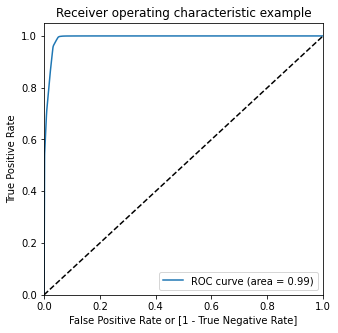

In [ ]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_pred = dt_bal_adasyn_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[53880  2986]
 [   15    81]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9473157543625575
Sensitivity:- 0.84375
Specificity:- 0.9474905919178419


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.97     56866
           1       0.03      0.84      0.05        96

    accuracy                           0.95     56962
   macro avg       0.51      0.90      0.51     56962
weighted avg       1.00      0.95      0.97     56962



In [ ]:
# Predicted probability
y_test_pred_proba = dt_bal_adasyn_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9141440147305362

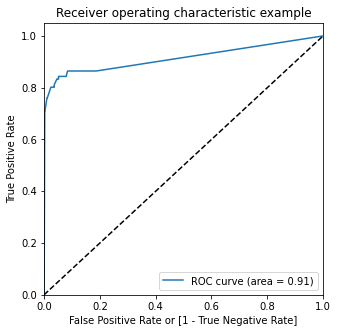

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.97
    - Sensitivity = 0.99
    - Specificity = 0.94
    - ROC-AUC = 0.99
- Test set
    - Accuracy = 0.94
    - Sensitivity = 0.84
    - Specificity = 0.94
    - ROC-AUC = 0.91

### XGBoost

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=XGBClassifier(max_depth=2, n_estimators=200),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,59.013542,0.796439,0.688165,0.010696,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.975756,0.996202,0.995163,0.989040,0.009403,4,0.999304,0.999014,0.999286,0.999201,0.000133
1,74.307404,0.948916,0.719149,0.032612,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.978500,0.996075,0.993204,0.989260,0.007698,3,0.999295,0.999072,0.999224,0.999197,0.000093
2,78.662612,0.179885,0.684868,0.005771,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.977110,0.996104,0.993729,0.988981,0.008450,5,0.999300,0.999069,0.999194,0.999188,0.000095
3,58.370095,1.606200,0.701060,0.003715,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.979174,0.998146,0.998146,0.991822,0.008944,1,0.999937,0.999934,0.999942,0.999938,0.000004
4,74.323895,1.257908,0.697232,0.006392,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.971403,0.996825,0.997548,0.988592,0.012158,6,0.999950,0.999942,0.999947,0.999946,0.000003
5,80.238414,1.130367,0.692684,0.008310,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.977356,0.998183,0.995571,0.990370,0.009264,2,0.999953,0.999935,0.999955,0.999948,0.000009


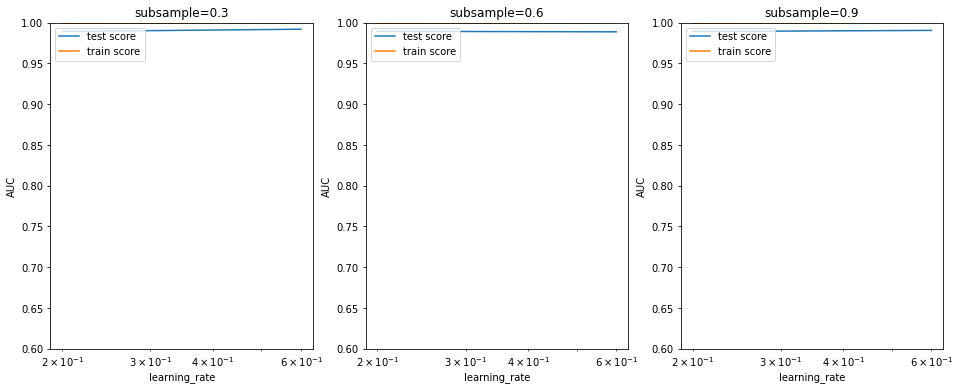

In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


for n, subsample in enumerate(param_grid['subsample']):


    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [ ]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.3}

In [ ]:
# chosen hyperparameters

params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.3,
         'objective':'binary:logistic'}

# fit model on training data
xgb_bal_adasyn_model = XGBClassifier(params = params)
xgb_bal_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

XGBClassifier(params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.3})

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = xgb_bal_adasyn_model.predict(X_train_adasyn)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train_adasyn, y_train_adasyn)
print(confusion)

[[227449      0]
 [     0 227448]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_adasyn, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9785467919111359
Sensitivity:- 1.0
Specificity:- 1.0


In [ ]:
# classification_report
print(classification_report(y_train_adasyn, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98    227449
           1       0.97      0.99      0.98    227448

    accuracy                           0.98    454897
   macro avg       0.98      0.98      0.98    454897
weighted avg       0.98      0.98      0.98    454897



In [ ]:
# Predicted probability
y_train_pred_proba = xgb_bal_adasyn_model.predict_proba(X_train_adasyn)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba)
auc

0.9970449095941256

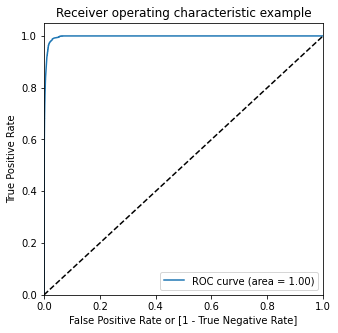

In [ ]:
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

##### Prediction on the test set

In [ ]:
# Predictions on the test set
y_test_pred = xgb_bal_adasyn_model.predict(X_test)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[54863  2003]
 [   11    85]]


In [ ]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9646430953969313
Sensitivity:- 0.8854166666666666
Specificity:- 0.964776843808251


In [ ]:
# classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98     56866
           1       0.04      0.89      0.08        96

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.53     56962
weighted avg       1.00      0.96      0.98     56962



In [ ]:
# Predicted probability
y_test_pred_proba = xgb_bal_adasyn_model.predict_proba(X_test)[:,1]

In [ ]:
# roc_auc
auc = metrics.roc_auc_score(y_test, y_test_pred_proba)
auc

0.9658537541471764

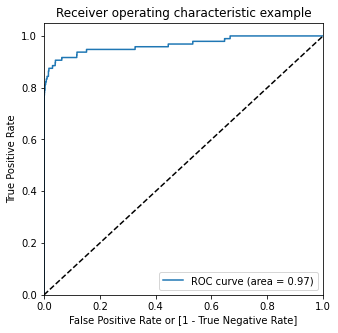

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

***Model summary***

- Train set
    - Accuracy = 0.97
    - Sensitivity = 1.0
    - Specificity = 1.0
    - ROC-AUC = 0.99
- Test set
    - Accuracy = 0.96
    - Sensitivity = 0.88
    - Specificity = 0.96
    - ROC-AUC = 0.96

### Choosing best model on the balanced data

We used a variety of approaches, including undersampling, oversampling, SMOTE, and adasy, to balance the data. We developed a number of models, including Random Forest, XGBoost, Decision Trees, and Logistic, for each data balancing technique.

It is evident that nearly every model had a somewhat satisfactory performance. However, we ought to be curious about the top model.

Even though the models using the undersampling technique performed well, we should be aware that some information was lost during the undersampling process. Therefore, it is advisable to disregard the undersampling models.

On the other hand, the Adasyn and SMOTE models did well. The simplest of those models, logistic regression, has a ROC score of 0.97 on the test set and 0.99 on the train set. Because the models are simple to understand and require less resources to build than more complex models like Random Forest or XGBoost, we can conclude that the logistic model is the best option.

Because of its simplicity and low resource requirements, we can therefore conclude that the `Logistic regression model with SMOTE' is the best model.

#### Print the FPR,TPR & select the best threshold from the roc curve for the best model

In [ ]:
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred_proba_log_bal_smote))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred_proba_log_bal_smote)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 0.9897539730388945
Threshold= 0.5311563618970118


We can see that the threshold is 0.53, for which the TPR is the highest and FPR is the lowest and we got the best ROC score.

## Cost benefit analysis
To date, we have experimented with a number of models using both balanced and imbalanced data. We have observed that the majority of the models have done fairly well when it comes to ROC score, precision, and recall.

However, there are a few factors to take into account when choosing the optimal model, such as whether or not we have the necessary computing power, resources, or infrastructure to run the model. Models like Random Forest, SVM, and XGBoost demand a lot of processing power, and building that infrastructure eventually raises the cost of running the model. However, the cost of developing a simpler model, like logistic regression, is lower because it uses fewer computer resources.

We also need to take into account that for a slight variation in the ROC

## Summary
We would prefer high precision for banks with lower average transaction values because we only want to flag relevant transactions as fraudulent. We can add a human element to any transaction that is suspected of being fraudulent in order to call the customer and confirm whether the transaction actually took place. These tasks become burdensome when precision is low, though, as more human intervention is required.
For banks having a larger transaction value, if the recall is low, i.e., it is unable to detect transactions that are labelled as non-fraudulent. So we have to consider the losses if the missed transaction was a high-value fraudulent one.

Thus, in this case, we need to concentrate on a high recall in order to identify genuine fraudulent transactions and protect the banks from high-value fraudulent transactions.

After running a number of models, we discovered that the most straightforward logistic regression model has a high recall rate and a good ROC score in the balanced dataset using the SMOTE technique. Therefore, in this case, the logistic model makes sense. Additionally, it is simpler to understand and communicate to businesses.